In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
!pip install hdbscan
import hdbscan
from sklearn.cluster import Birch
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.cluster import KMeans
!pip install pyclustering
from pyclustering.cluster.clarans import clarans
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/DA/KDDCup99.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.isnull().sum())

df = df.dropna()

df = pd.get_dummies(df)
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [ ]:
# Standardize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(scaled_df)


print("Shape after PCA:", pca_df.shape)


Shape after PCA: (494020, 94)


DBSCAN

DBSCAN resulted in a single cluster. Scores cannot be calculated.


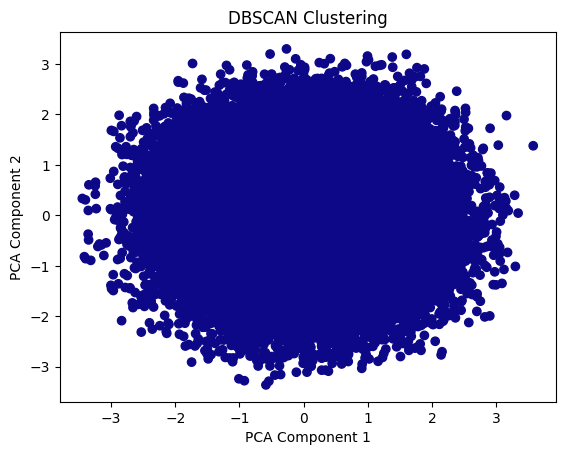

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

df = pd.DataFrame(np.random.rand(100000, 10), columns=[f'feature_{i}' for i in range(10)])

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply PCA to reduce dimensionality (e.g., to 2 components)
pca = PCA(n_components=2)  # Adjust n_components based on your needs
pca_df = pca.fit_transform(scaled_data)

# Step 4: Sample a subset of the data if the dataset is too large
if pca_df.shape[0] > 49000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Step 5: Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=10)  # Adjust the parameters based on your data
dbscan_labels = dbscan.fit_predict(pca_df_sampled)

# Step 6: Evaluate DBSCAN
# Check if there is more than one cluster to calculate the evaluation scores
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(pca_df_sampled, dbscan_labels)
    dbscan_db_score = davies_bouldin_score(pca_df_sampled, dbscan_labels)
    dbscan_ch_score = calinski_harabasz_score(pca_df_sampled, dbscan_labels)

    print("DBSCAN Silhouette Score:", dbscan_silhouette)
    print("DBSCAN Davies-Bouldin Score:", dbscan_db_score)
    print("DBSCAN Calinski-Harabasz Index:", dbscan_ch_score)
else:
    print("DBSCAN resulted in a single cluster. Scores cannot be calculated.")

# Optional: Plot the clusters
import matplotlib.pyplot as plt

plt.scatter(pca_df_sampled[:, 0], pca_df_sampled[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


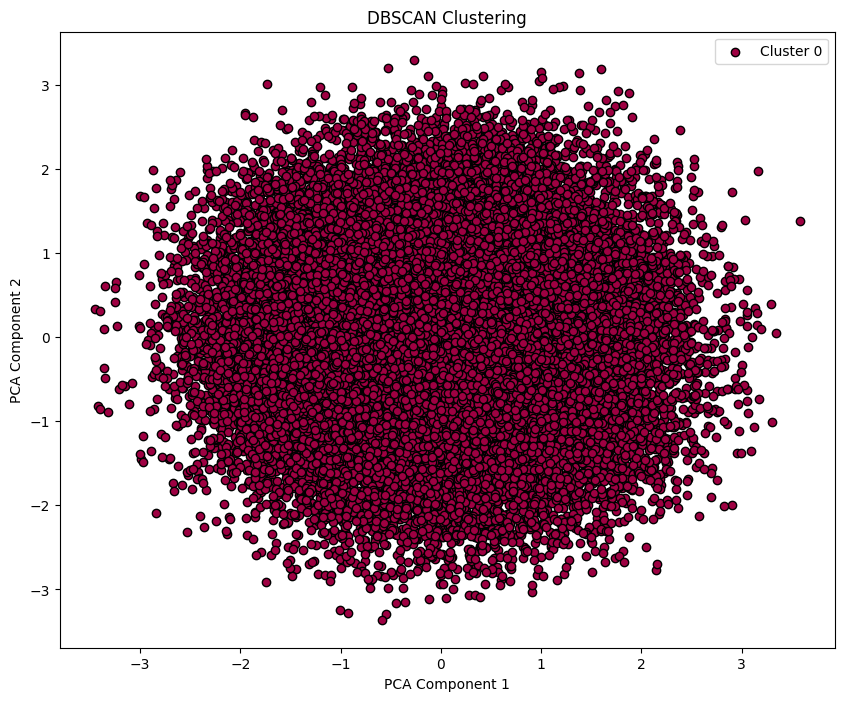

In [ ]:
plt.figure(figsize=(10, 8))


unique_labels = set(dbscan_labels)


colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'

    class_member_mask = (dbscan_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Spectral Clustering

Spectral Clustering Silhouette Score: 0.3096556086689647
Spectral Clustering Davies-Bouldin Score: 0.9182675943920762
Spectral Clustering Calinski-Harabasz Index: 24114.325095119875


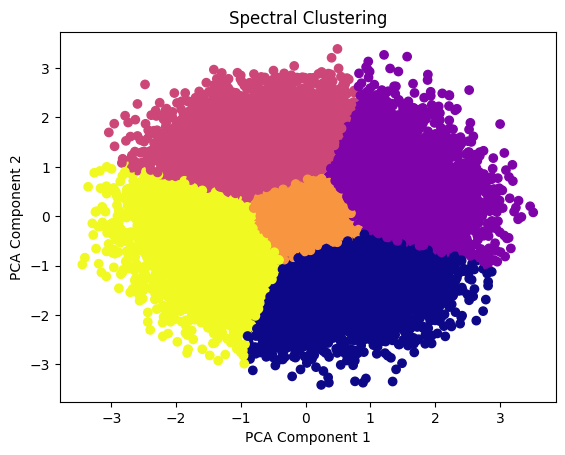

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt


# For example purposes, we will create a dummy dataset
df = pd.DataFrame(np.random.rand(100000, 10), columns=[f'feature_{i}' for i in range(10)])

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply PCA to reduce dimensionality (e.g., to 2 components)
pca = PCA(n_components=2)  # Adjust n_components based on your needs
pca_df = pca.fit_transform(scaled_data)

# Step 4: Sample a subset of the data if the dataset is too large
if pca_df.shape[0] > 40000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Step 5: Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_jobs=-1)  # Using all processors
spectral_labels = spectral.fit_predict(pca_df_sampled)

# Step 6: Evaluate Spectral Clustering
spectral_silhouette = silhouette_score(pca_df_sampled, spectral_labels)
spectral_db_score = davies_bouldin_score(pca_df_sampled, spectral_labels)
spectral_ch_score = calinski_harabasz_score(pca_df_sampled, spectral_labels)

print("Spectral Clustering Silhouette Score:", spectral_silhouette)
print("Spectral Clustering Davies-Bouldin Score:", spectral_db_score)
print("Spectral Clustering Calinski-Harabasz Index:", spectral_ch_score)

# Optional: Plot the clusters
plt.scatter(pca_df_sampled[:, 0], pca_df_sampled[:, 1], c=spectral_labels, cmap='plasma')
plt.title('Spectral Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


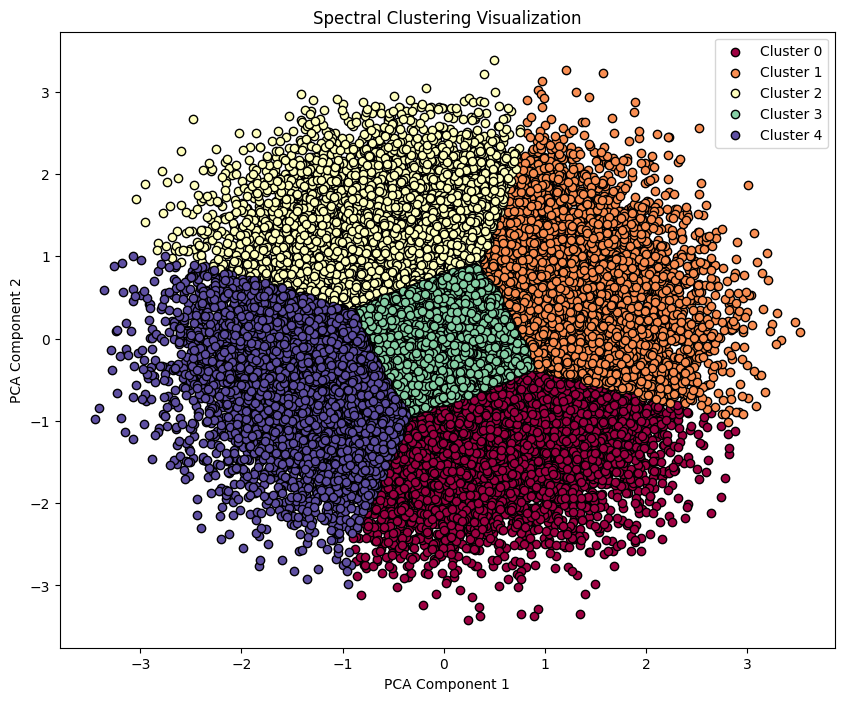

In [ ]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Unique labels in the clustering result
unique_labels = set(spectral_labels)

# Generate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    class_member_mask = (spectral_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

plt.title('Spectral Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


HDBSCAN

HDBSCAN Silhouette Score: 0.2761747027816936
HDBSCAN Davies-Bouldin Score: 39.031962370780114
HDBSCAN Calinski-Harabasz Index: 20.98806305728181


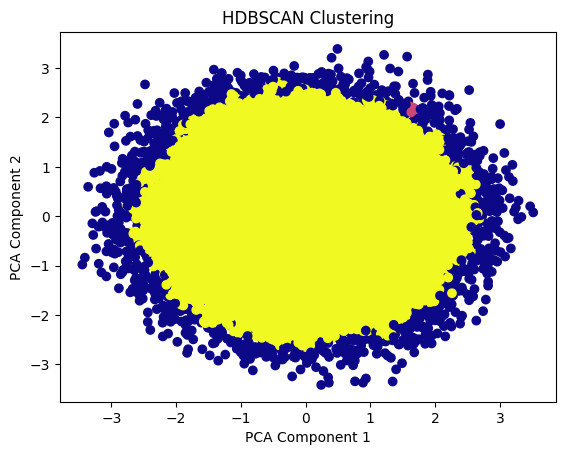

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import hdbscan  # Importing HDBSCAN
import matplotlib.pyplot as plt


# For example purposes, we will create a dummy dataset
df = pd.DataFrame(np.random.rand(100000, 10), columns=[f'feature_{i}' for i in range(10)])  # Dummy dataset

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Adjust n_components based on your needs
pca_df = pca.fit_transform(scaled_data)

# Step 4: Sample a subset of the data if the dataset is too large
if pca_df.shape[0] > 40000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 40000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Step 5: Apply HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_clusterer.fit_predict(pca_df_sampled)

# Step 6: Evaluate HDBSCAN
if len(set(hdbscan_labels)) > 1:
    hdbscan_silhouette = silhouette_score(pca_df_sampled, hdbscan_labels)
    hdbscan_db_score = davies_bouldin_score(pca_df_sampled, hdbscan_labels)
    hdbscan_ch_score = calinski_harabasz_score(pca_df_sampled, hdbscan_labels)

    print("HDBSCAN Silhouette Score:", hdbscan_silhouette)
    print("HDBSCAN Davies-Bouldin Score:", hdbscan_db_score)
    print("HDBSCAN Calinski-Harabasz Index:", hdbscan_ch_score)
else:
    print("HDBSCAN resulted in a single cluster. Scores cannot be calculated.")

# Optional: Plot the clusters
plt.scatter(pca_df_sampled[:, 0], pca_df_sampled[:, 1], c=hdbscan_labels, cmap='plasma')
plt.title('HDBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


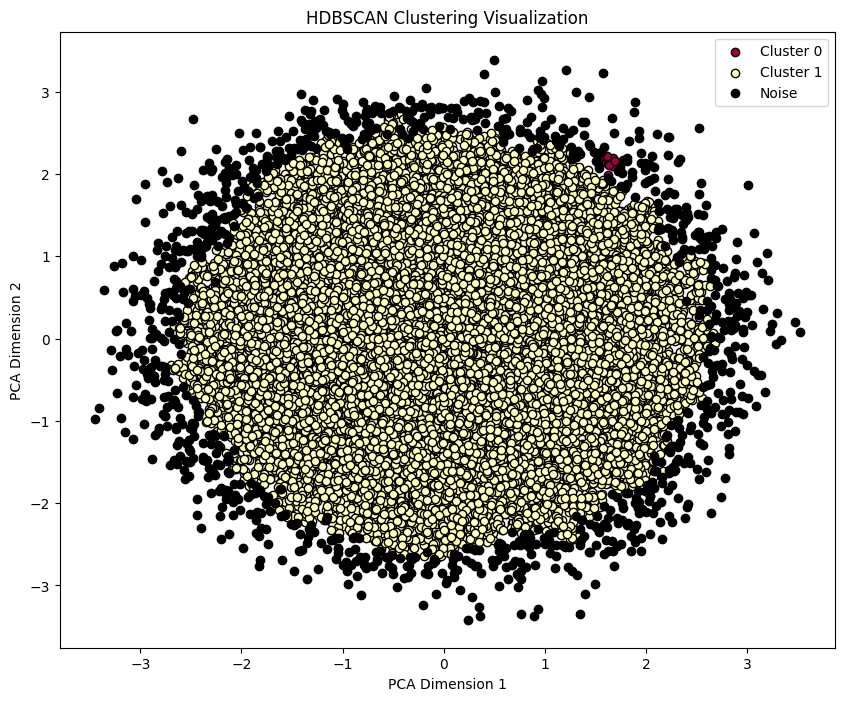

In [ ]:
plt.figure(figsize=(10, 8))


unique_labels = set(hdbscan_labels)


colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Limit the number of clusters to show in the legend
max_legend_clusters = 10

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (hdbscan_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Noise')

# Add title and labels
plt.title('HDBSCAN Clustering Visualization')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

# Create a custom legend with a limited number of clusters
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show only the first max_legend_clusters clusters in the legend
if len(by_label) > max_legend_clusters:
    legend_labels = list(by_label.keys())[:max_legend_clusters] + ['Other clusters...']
    legend_handles = list(by_label.values())[:max_legend_clusters] + [plt.Line2D([0], [0], linestyle="none")]
    plt.legend(legend_handles, legend_labels, loc='best')
else:
    plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()


KMedoids

Optimal number of clusters: 4
KMedoids Scores: {'Silhouette': 0.31776643804875293, 'Davies-Bouldin': 0.9195285643639097, 'Calinski-Harabasz': 12652.760032349637}


<ipython-input-12-e1c60ef7d2d9>:70: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(*zip(*legend_items), loc='best')


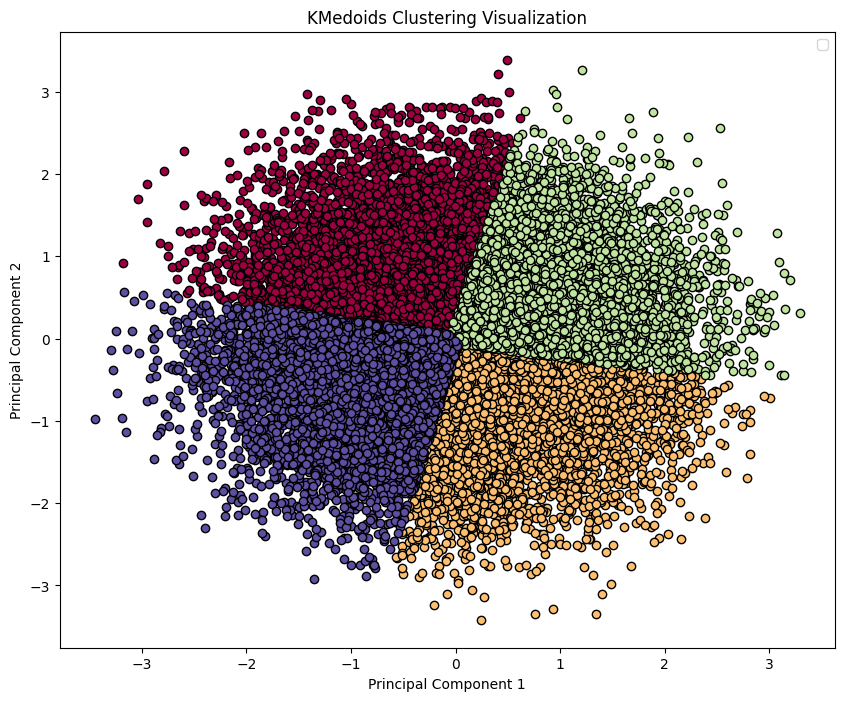

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids

# Assuming 'pca_df' is a numpy array and already loaded
if pca_df.shape[0] > 20000:
    np.random.seed(42)
    sample_indices = np.random.choice(pca_df.shape[0], 20000, replace=False)
    pca_df_sampled = pca_df[sample_indices]
else:
    pca_df_sampled = pca_df

# Function to find the optimal number of clusters using silhouette score
def find_optimal_clusters(data, max_k, step=2):
    best_k = 2
    best_score = -1
    scores = []
    for k in range(2, max_k + 1, step):
        kmedoids = KMedoids(n_clusters=k, random_state=42, init='k-medoids++')
        labels = kmedoids.fit_predict(data)
        if len(set(labels)) == 1:  # Handling the case where only one cluster is formed
            continue
        score = silhouette_score(data, labels)
        scores.append(score)
        if score > best_score:
            best_k = k
            best_score = score
    return best_k, scores

# Find optimal number of clusters
optimal_k, all_scores = find_optimal_clusters(pca_df_sampled, 10)
print("Optimal number of clusters:", optimal_k)

# Attempt clustering with the optimal number of clusters
try:
    kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, init='k-medoids++')
    kmedoids_labels = kmedoids.fit_predict(pca_df_sampled)

    # Ensure that no cluster is empty
    if len(set(kmedoids_labels)) == optimal_k:
        scores = {
            'Silhouette': silhouette_score(pca_df_sampled, kmedoids_labels),
            'Davies-Bouldin': davies_bouldin_score(pca_df_sampled, kmedoids_labels),
            'Calinski-Harabasz': calinski_harabasz_score(pca_df_sampled, kmedoids_labels)
        }
        print("KMedoids Scores:", scores)
    else:
        print("One or more clusters are empty. Adjust parameters or dataset.")
except Exception as e:
    print(f"Error during clustering: {str(e)}")

# Visualization code
plt.figure(figsize=(10, 8))
unique_labels = set(kmedoids_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
max_legend_clusters = 10

for k, col in zip(unique_labels, colors):
    class_member_mask = (kmedoids_labels == k)
    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

plt.title('KMedoids Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend_items = list(by_label.items())[:max_legend_clusters] + (('Other clusters...', plt.Line2D([0], [0], linestyle="none")),) if len(by_label) > max_legend_clusters else by_label.items()
plt.legend(*zip(*legend_items), loc='best')
plt.show()


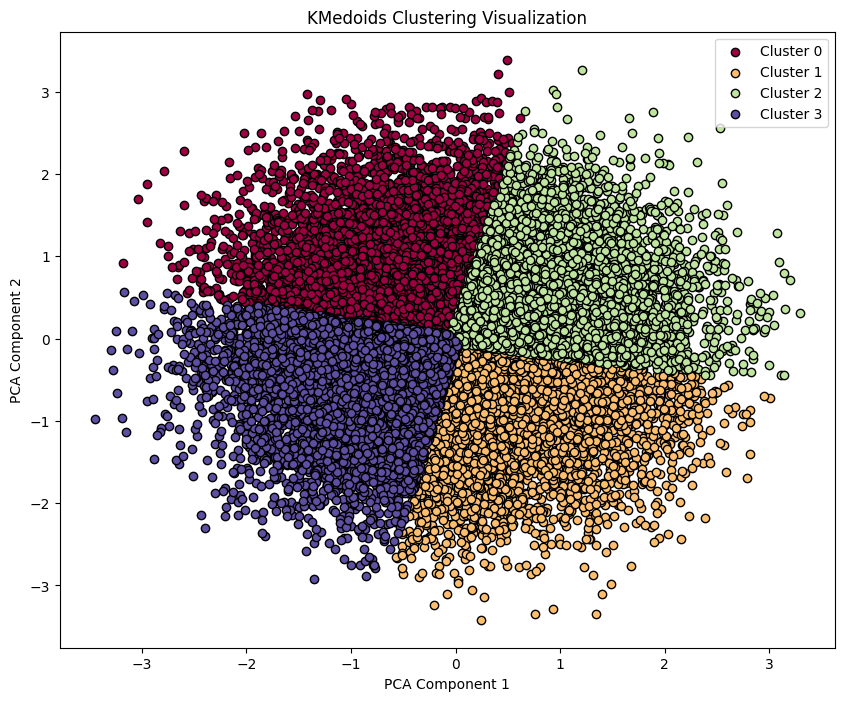

In [ ]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Unique labels in the clustering result
unique_labels = set(kmedoids_labels)

# Generate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Limit the number of clusters to show in the legend
max_legend_clusters = 10

# Plot each cluster with a different color
for k, col in zip(unique_labels, colors):
    class_member_mask = (kmedoids_labels == k)

    xy = pca_df_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolor='k', label=f'Cluster {k}')

# Add title and labels
plt.title('KMedoids Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create a custom legend with a limited number of clusters
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show only the first max_legend_clusters clusters in the legend
if len(by_label) > max_legend_clusters:
    legend_labels = list(by_label.keys())[:max_legend_clusters] + ['Other clusters...']
    legend_handles = list(by_label.values())[:max_legend_clusters] + [plt.Line2D([0], [0], linestyle="none")]
    plt.legend(legend_handles, legend_labels, loc='best')
else:
    plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()
